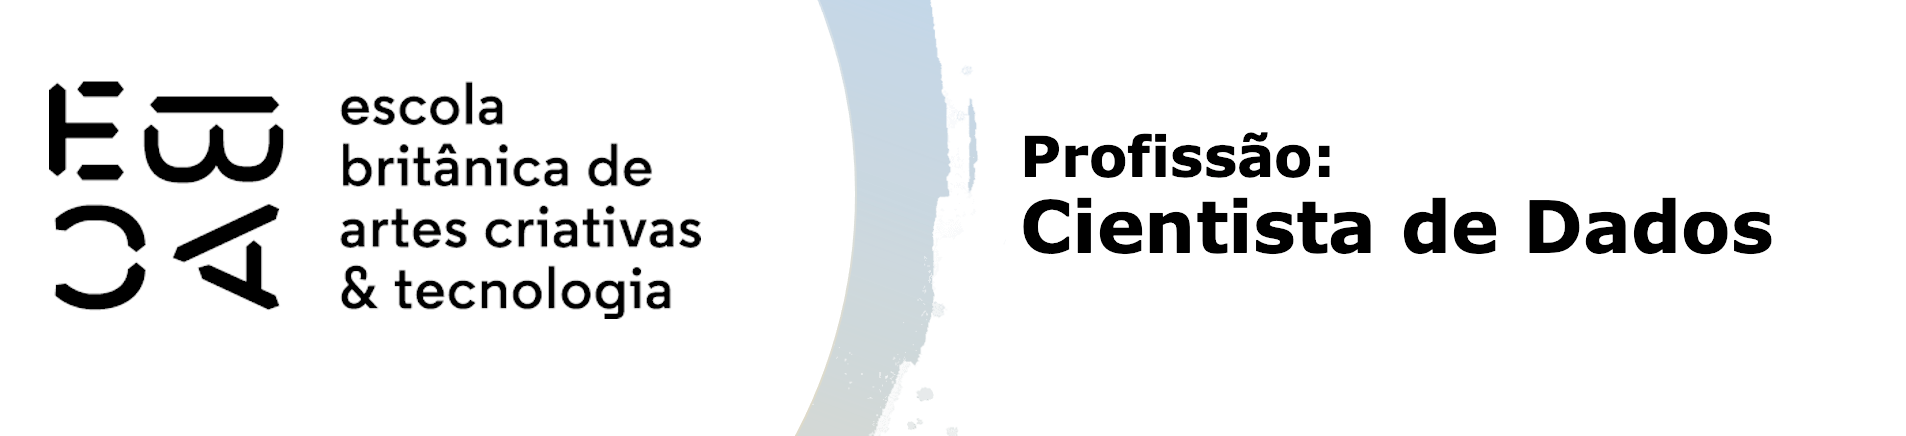

# Métodos hierárquicos de agrupamento - Tarefa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from gower import gower_matrix
%matplotlib inline

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [28]:
# Carregando a base
peng = sns.load_dataset('penguins')
peng.index.name = 'id'

# Selecionando variáveis quantitativas e eliminando valores faltantes
peng_num = peng.select_dtypes(include='number').dropna()

# Padronizando as variáveis
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

# Realizando o agrupamento hierárquico em 3 grupos
clus = AgglomerativeClustering(
    linkage='complete',   # Método de ligação
    distance_threshold=None,  # Sem limite de distância, então usamos n_clusters
    n_clusters=3           # Definindo 3 clusters
)

# Treinando o algoritmo
clus.fit(peng_pad)

# Adicionando os clusters como uma coluna no DataFrame original
peng_num['Cluster'] = clus.labels_

# Fazendo o dendrograma usando o método 'complete' para ligação
Z = linkage(peng_pad, method='complete')

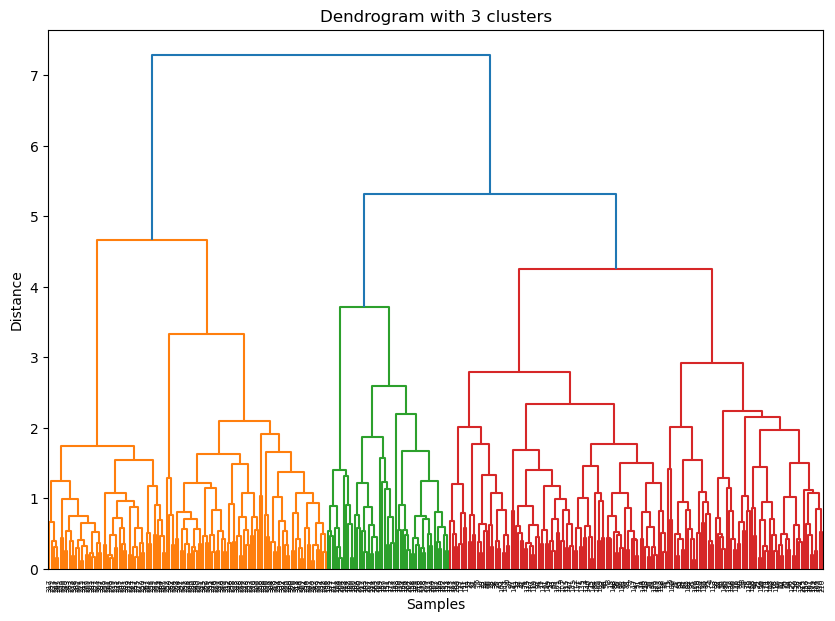

In [30]:
# Plotando o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=150, color='r', linestyle='--')  # Ajuste o valor de 'y' conforme necessário
plt.title("Dendrogram with 3 clusters")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [80]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)


In [82]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [84]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [88]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_x,grupo_y,grupo
id,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0,1.0


CPU times: total: 2.2 s
Wall time: 6.55 s


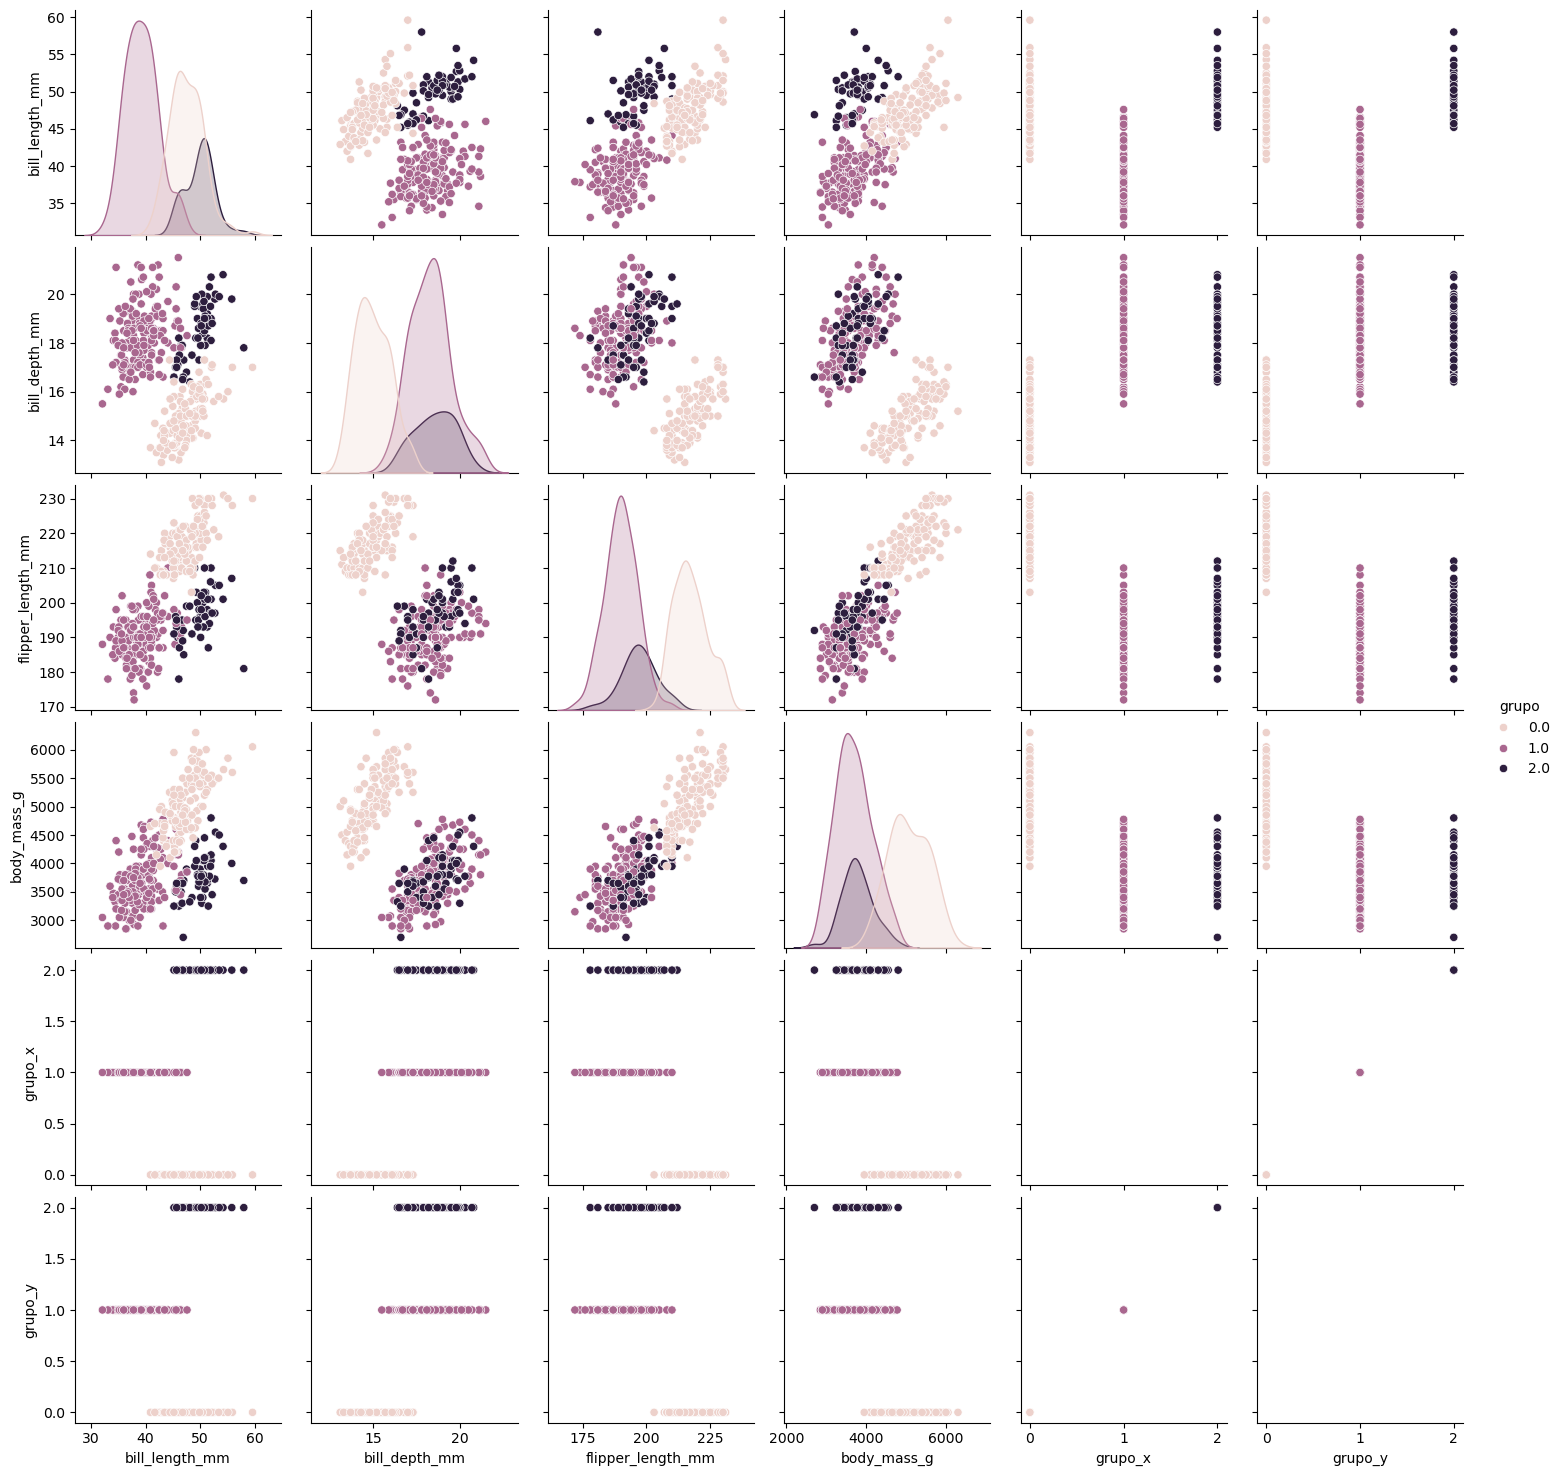

In [90]:
%%time
# 1. Contagem de pinguins de cada espécie por grupo
sns.pairplot(data=peng, hue='grupo')

In [63]:
# 2. Tabela cruzada da espécie por grupo
contingency_table = pd.crosstab(peng['species'], peng['grupo'])
print("\nContagem de pinguins por espécie e por grupo:")
print(contingency_table)


Contagem de pinguins por espécie e por grupo:
grupo      0.0  1.0  2.0
species                 
Adelie       0  151    0
Chinstrap    0   14   54
Gentoo     123    0    0


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [92]:
# agrupamento hierárquico em 5 grupos
clus_6 = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=6
)

# treinando o algoritmo
clus_6.fit(peng_pad)

peng_num['grupo_6'] = clus_6.labels_
peng = peng.merge(peng_num['grupo_6'], how='left', on='id')

In [94]:

pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [96]:

pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [98]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'], normalize='index')

grupo_6                0.0       1.0       2.0       3.0       4.0       5.0
species   sex                                                               
Adelie    Female  0.000000  0.945205  0.054795  0.000000  0.000000  0.000000
          Male    0.000000  0.246575  0.753425  0.000000  0.000000  0.000000
Chinstrap Female  0.000000  0.147059  0.264706  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  0.000000  0.000000  0.647059  0.352941
Gentoo    Female  0.155172  0.000000  0.000000  0.844828  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000

CPU times: total: 5.67 s
Wall time: 9.09 s


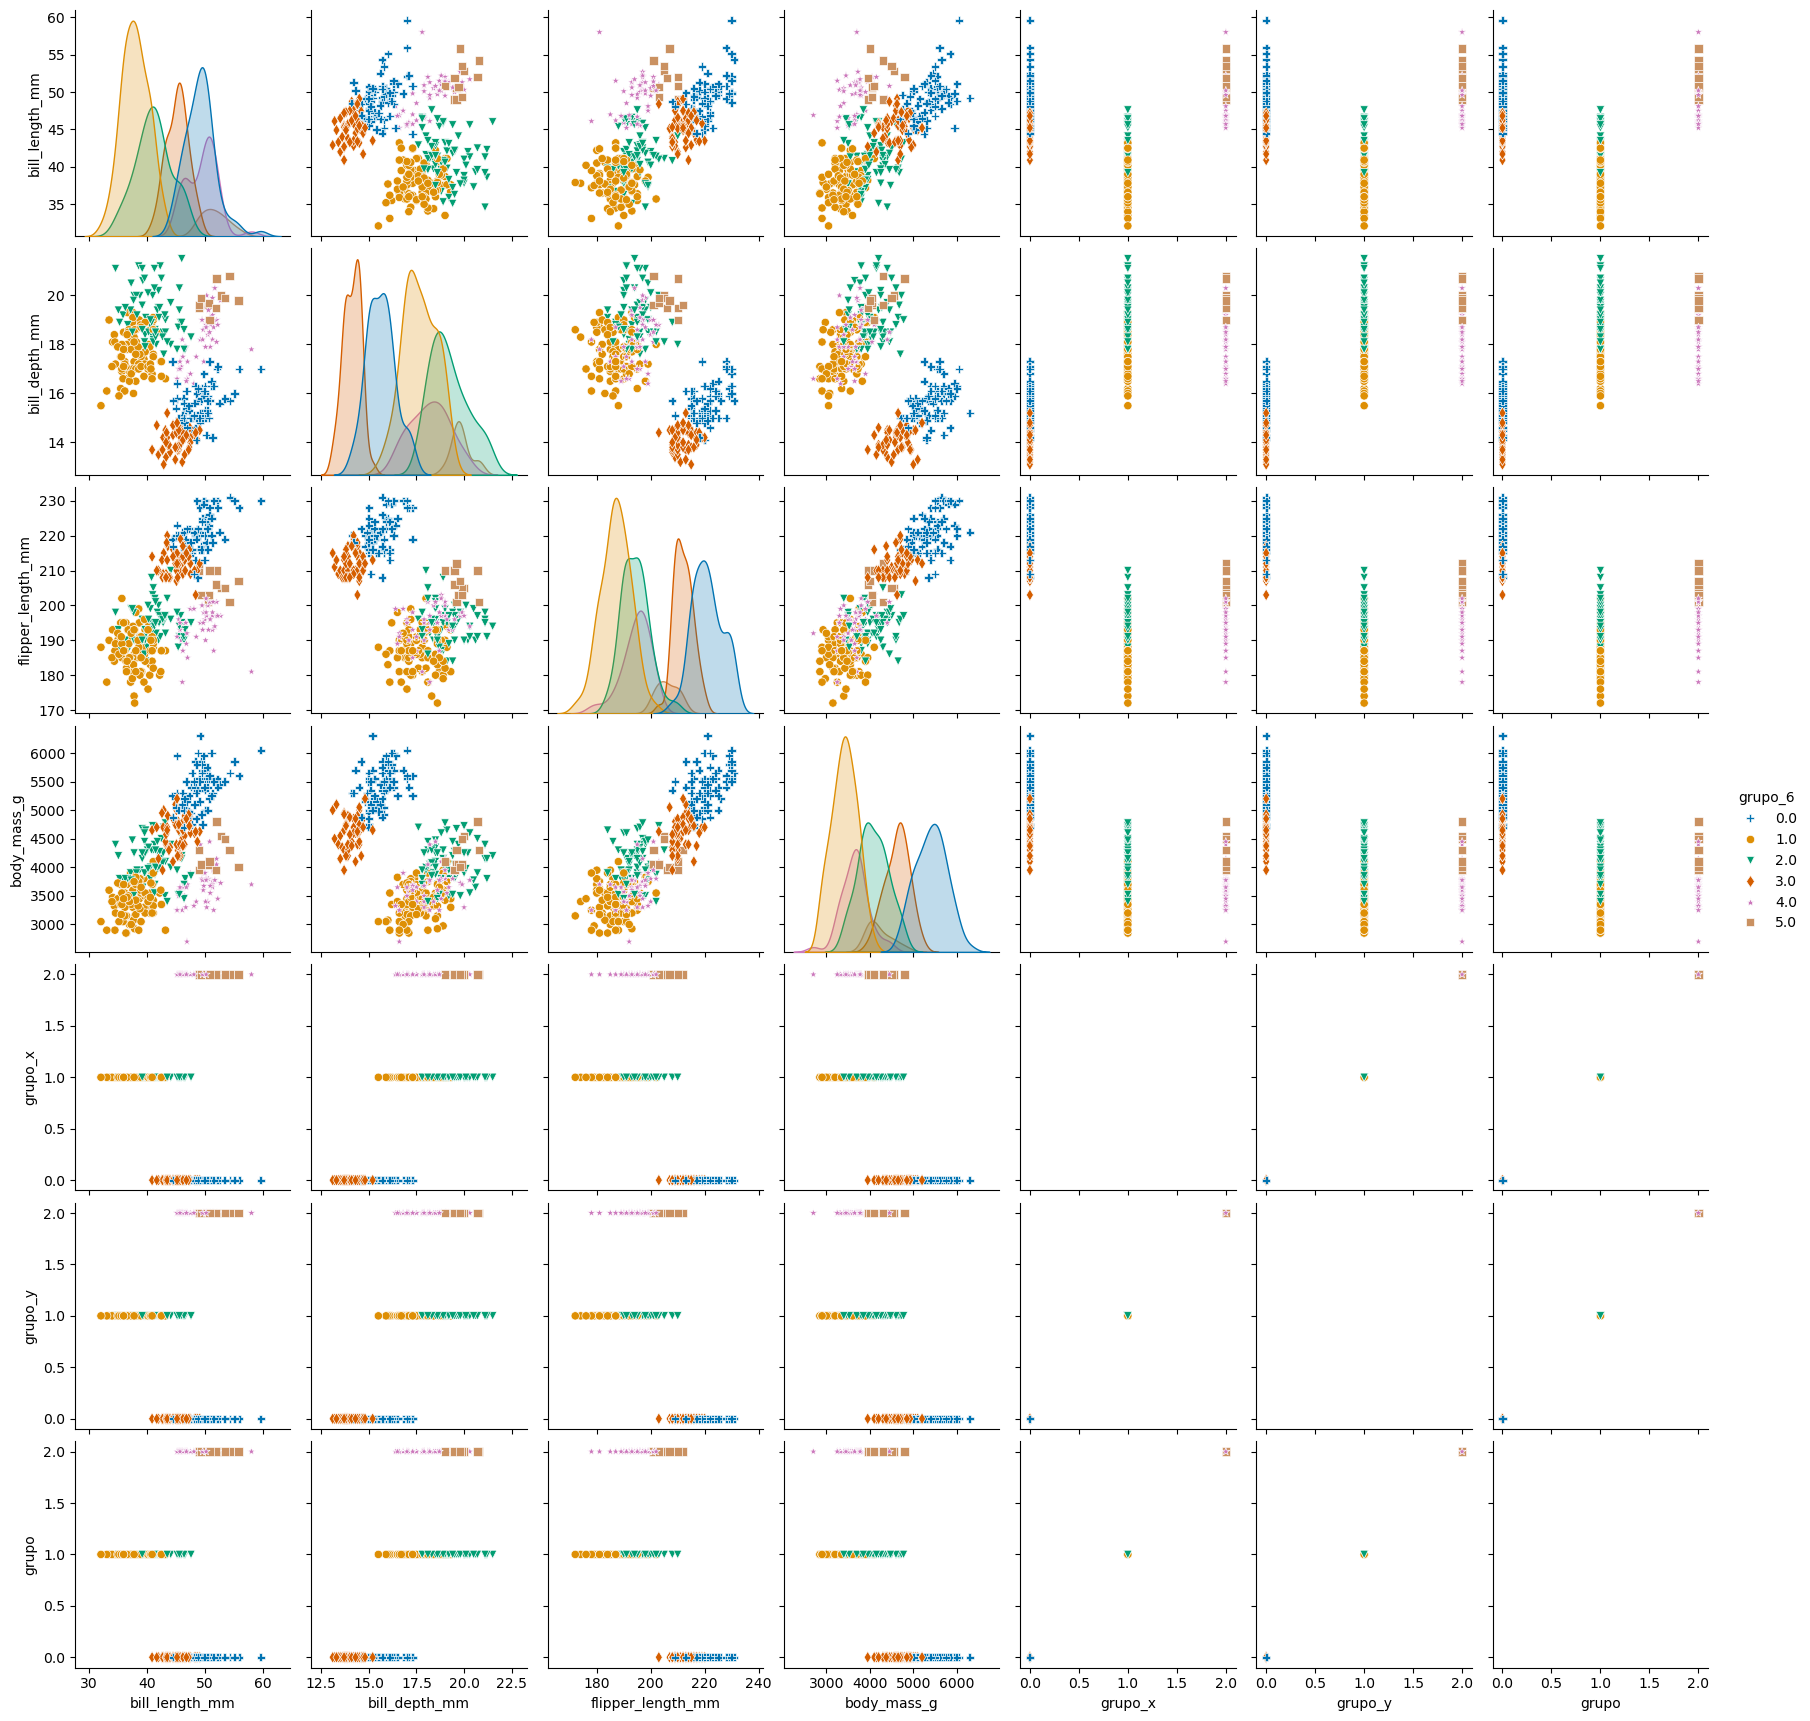

In [100]:
%%time
sns.pairplot(data=peng, hue='grupo_6', markers=['P', 'o', 'v', 'd', '*', 's'], palette='colorblind')

O cluster 0 parece capturar principalmente os machos de Gentoo e algumas fêmeas.
O cluster 1 é composto principalmente por fêmeas de Adelie e uma parte significativa dos machos dessa espécie.
O cluster 2 inclui uma mistura de machos de Adelie e algumas fêmeas de Chinstrap.
O cluster 3 captura a maioria das fêmeas de Gentoo.
O cluster 4 é majoritariamente formado por machos e fêmeas de Chinstrap.
O cluster 5 é um subgrupo menor de machos de Chinstrap.